In [2]:
library(caTools)
library(rpart)
library(gmodels)
library(plyr)
library(dplyr)
library(DMwR)
library(ggplot2)
library(arules)
library(RColorBrewer)
library(arulesViz)
library(readr)

Warning message:
"package 'readr' was built under R version 3.6.3"

In [5]:
Iris = read.csv('Iris.csv', header = TRUE)
head(Iris,5)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Verify if all Data Fields are Imported

In [6]:
dim(Iris)

[1] 150   6

# Verify if the class of each coloumn is as desired for statistical evaluation.

In [7]:
str(Iris)

'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


# Verify the MIN-MAX Values & Check if any NAs present in dataset.

In [8]:
summary(Iris)

       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm              Species  
 Min.   :0.100   Iris-setosa    :50  
 1st Qu.:0.300   Iris-versicolor:50  
 Median :1.300   Iris-virginica :50  
 Mean   :1.199                       
 3rd Qu.:1.800                       
 Max.   :2.500                       

# scaling data set to attain uniformity in variable data definition. 
This is since clustering is done with calculating the distance of different data points to each other.
If the data value is not scaled to UNIFORMITY (for eg. - One column has data in the rage of 1 ~ 10 and the next     
column has data in the range of 0 ~ 1) the distance calculated between the points of such two coloumns/ variables will # be FALSE-LEADING for statistical measures.

In [9]:
Iris1 = Iris

Iris1= Iris1[,c(-1,-6)]

str(Iris3)
Iris3$Species= as.factor(Iris3$Species)
summary(Iris3$Species)

Iris2 =as.data.frame(scale(Iris1))

Iris3= cbind(Iris2, Iris[,c(1,6)])


write.csv(Iris3, file ='Iris3.csv')

Iris4= read.csv(file ='Iris4.csv', header = TRUE)

Iris4= Iris4[, c(-1,-7)]

str(Iris4)
colSums(is.na(Iris4))
rowSums(is.na(Iris4))

'data.frame':	150 obs. of  6 variables:
 $ SepalLengthCm: num  -0.898 -1.139 -1.381 -1.501 -1.018 ...
 $ SepalWidthCm : num  1.029 -0.125 0.337 0.106 1.259 ...
 $ PetalLengthCm: num  -1.34 -1.34 -1.39 -1.28 -1.34 ...
 $ PetalWidthCm : num  -1.31 -1.31 -1.31 -1.31 -1.31 ...
 $ Id           : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


Iris-setosa Iris-versicolor  Iris-virginica 
             50              50              50

'data.frame':	150 obs. of  6 variables:
 $ SepalLengthCm: num  -0.898 -1.139 -1.381 -1.501 -1.018 ...
 $ SepalWidthCm : num  1.029 -0.125 0.337 0.106 1.259 ...
 $ PetalLengthCm: num  -1.34 -1.34 -1.39 -1.28 -1.34 ...
 $ PetalWidthCm : num  -1.31 -1.31 -1.31 -1.31 -1.31 ...
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Speciesnew   : int  0 0 0 0 0 0 0 0 0 0 ...


SepalLengthCm  SepalWidthCm PetalLengthCm  PetalWidthCm            Id 
            0             0             0             0             0 
   Speciesnew 
            0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0

# Two types of Clustering exist - (1) HIRARCHIAL Clustering & (2) K-Means CLUSTERING

# HIRARCHIAL Clustering -
Euclidean Distance measuring between data points is the method adopted in Hirarchial Clustering. Since this method adapts calculation on distance usually this method is ustilised for clustering small data - MAXIMUM 500 Rows/ Observations.


#First we generate the distrance matrix for the data set-

In [10]:
d.euclidean= dist(x= Iris4[,1:4], method = 'euclidean')
print(d.euclidean, digits=3)

        1     2     3     4     5     6     7     8     9    10    11    12
2   1.178                                                                  
3   0.846 0.524                                                            
4   1.104 0.433 0.284                                                      
5   0.260 1.389 0.993 1.252                                                
6   1.039 2.184 1.855 2.102 0.900                                          
7   0.660 1.000 0.498 0.706 0.681 1.520                                    
8   0.266 0.932 0.597 0.844 0.465 1.282 0.504                              
9   1.622 0.646 0.783 0.524 1.770 2.622 1.185 1.363                        
10  0.964 0.271 0.376 0.385 1.168 1.984 0.826 0.714 0.773                  
11  0.589 1.725 1.434 1.688 0.538 0.542 1.197 0.844 2.206 1.515            
12  0.444 0.937 0.506 0.735 0.533 1.388 0.297 0.248 1.255 0.717 1.003      
13  1.216 0.178 0.498 0.363 1.411 2.240 0.989 0.964 0.551 0.266 1.775 0.939
14  1.520 0.

# The Clustering is Formed based on the Distance Matrix created and a Dendrogram is plotted identifying the cluster tree -

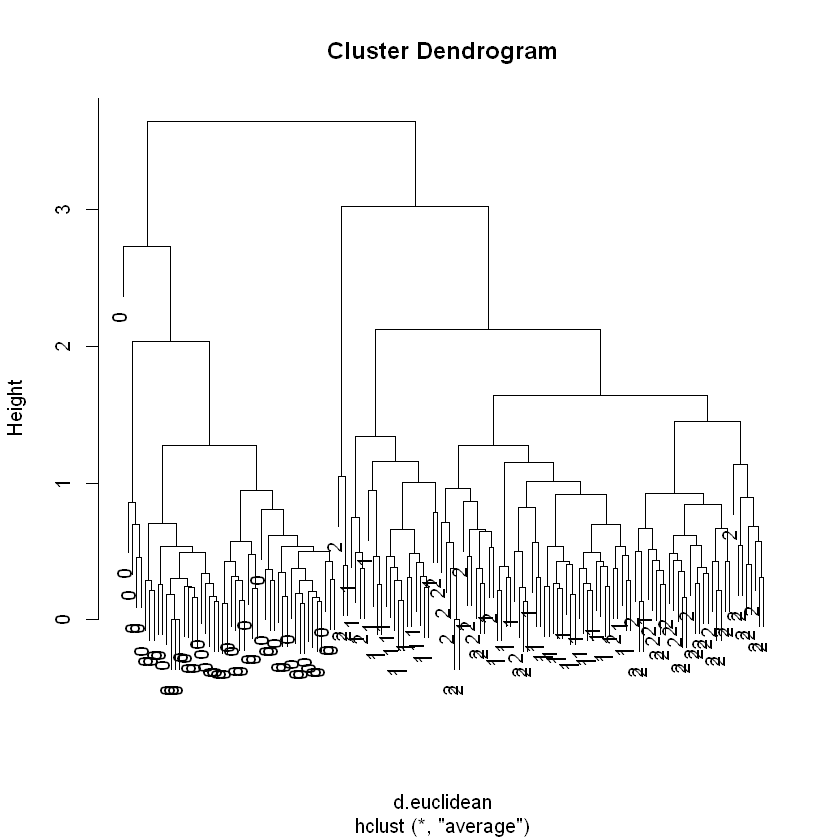

In [11]:
irishclust= hclust(d.euclidean, method = 'average')
plot(irishclust, labels = as.character(Iris4[,6]))

Now we cut the cluster dendrogram into THREE CLUSTERS - whhich is identified with RED Rectangular borders -

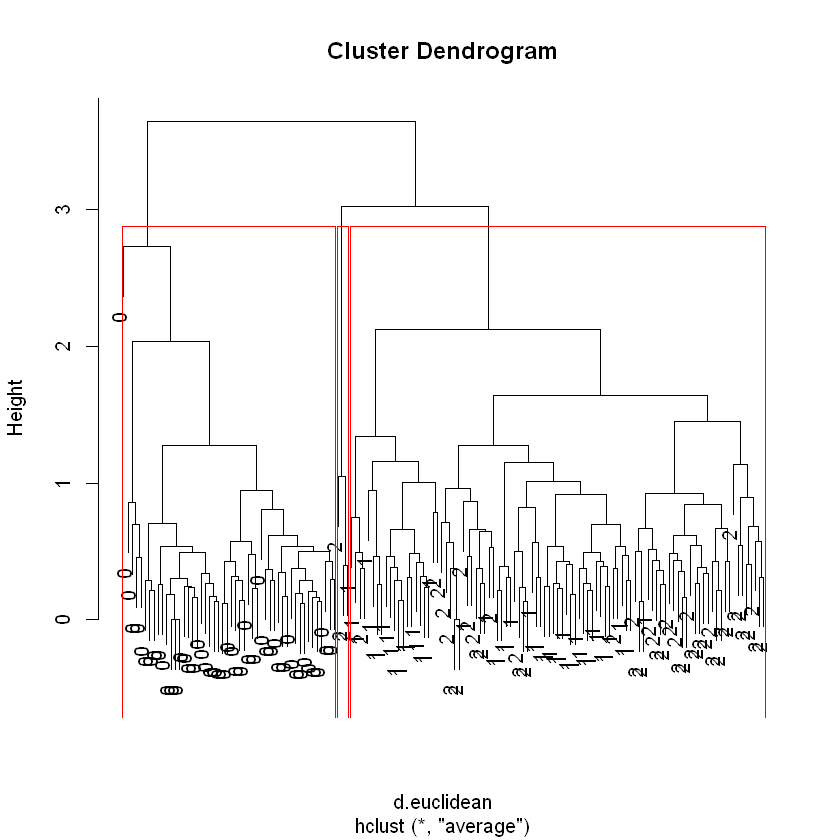

In [12]:
plot(irishclust, labels = as.character(Iris4[,6]))
rect.hclust(irishclust, k=3, border = 'red')

# Profiling of Clusters / Attache the generated clusters with the NAME in the data -

In [13]:
Iris4= cbind(Iris4, Iris[,c(6)])

# Create a vector with called 'groups' which has identifed 150 observations into Cluster groups by numbers -

In [14]:
groups= cutree(irishclust, k=3)

Create new dataset by joining the basic dataset with the coloumn identifying each row to each cluster -

In [15]:
Iris5= cbind(Iris,groups)

# Dataset is aggregates w.r.t. cluster identification number -

In [16]:
aggrIris= aggregate(Iris5[,c(2:5)],list(Iris5$groups),mean)
head(aggrIris)

Group.1,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.006000,3.418000,1.464000,0.244000
2,6.220619,2.845361,4.859794,1.658763
3,7.600000,3.733333,6.400000,2.233333


# Tabulated form of cluster , tabulated w.r.t. the mean value of each variable.

In [17]:
clus.profiling= data.frame(Group= aggrIris[,1],Freq= as.vector(table(Iris5$groups)),aggrIris[-1])

# Clusters is formed based on the SIZE of the FLOWER. 
Cluster 1 is with the SMALLEST FLOWER - FIFTY IN Numbers - Smallest Petal Length & Sepal Length

CLuster 2 is the MEDIUM SIZED FLOWER - NINTY SEVEN in Numbers - PETAL Length & Sepal Length larger than the smallest one.

Cluster 3 has the LARGEST FLOWERS of the complete 150 Flowers - THREE NUMBERS - having PETAL Length and SEPAL Length to its maximum.

# Visualisation - of the data graphically
Each plot shows the spread of complete range of each factor - Petal Width/ Petal Length/ Sepal Width/ Sepal Length - over the THREE Clusters.


The following object is masked _by_ .GlobalEnv:

    groups



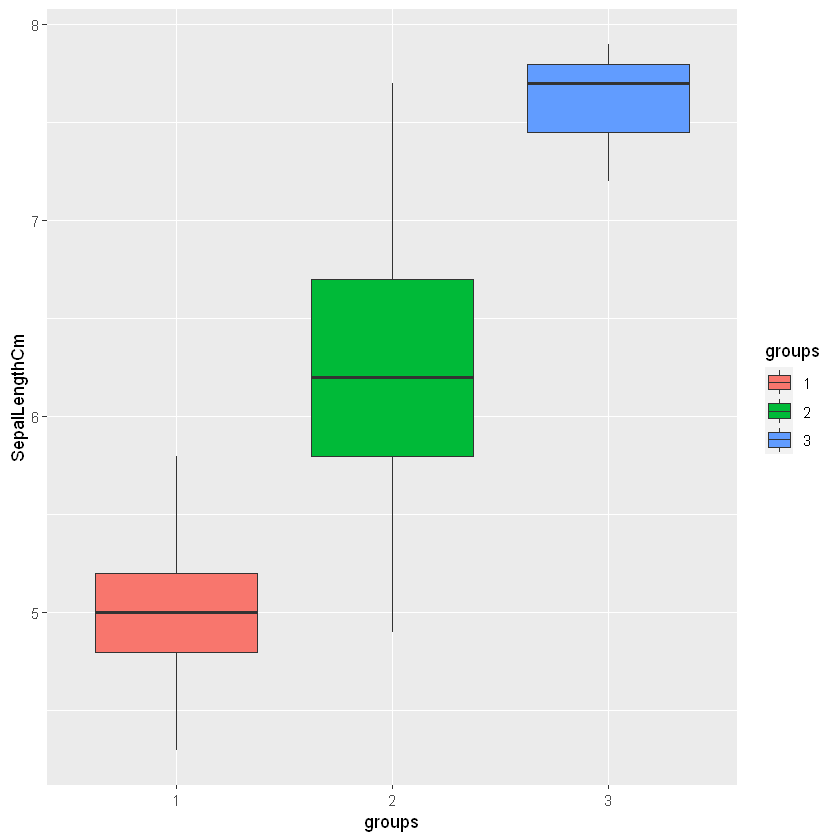

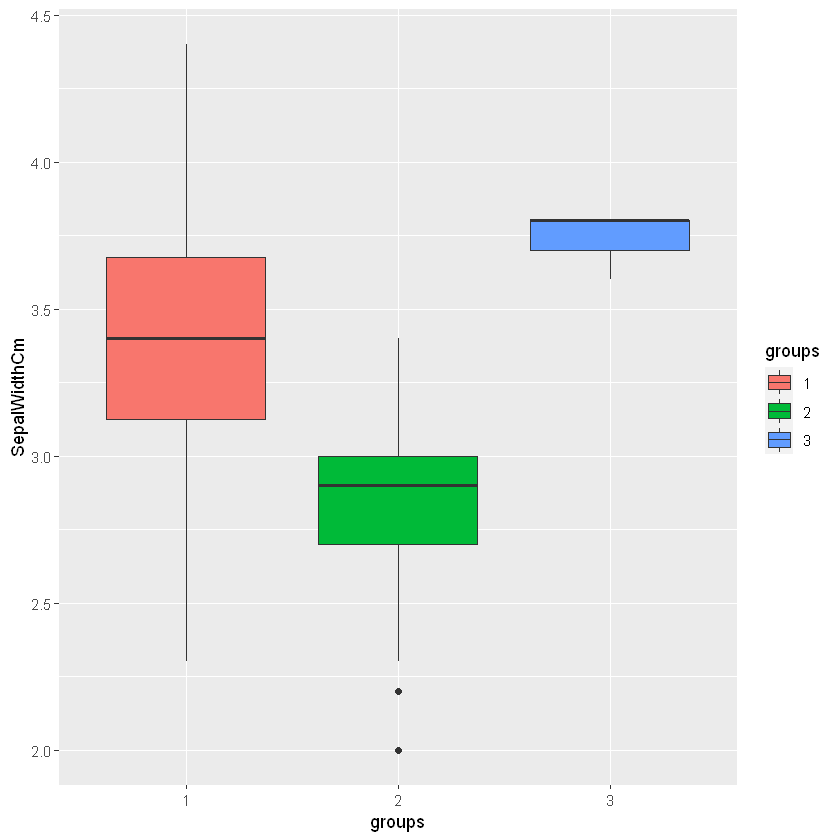

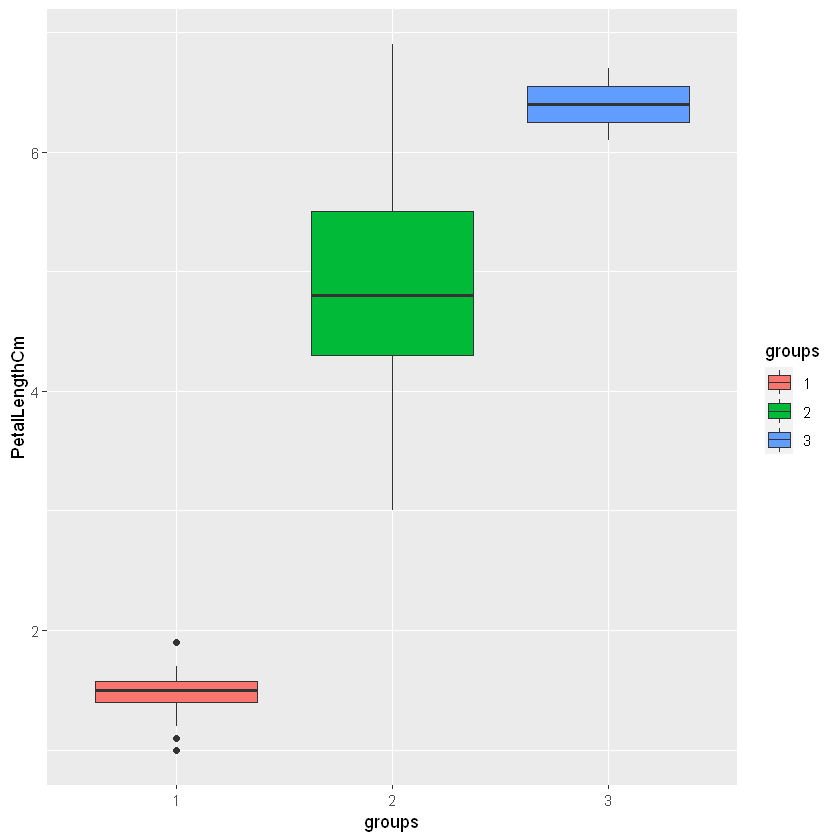

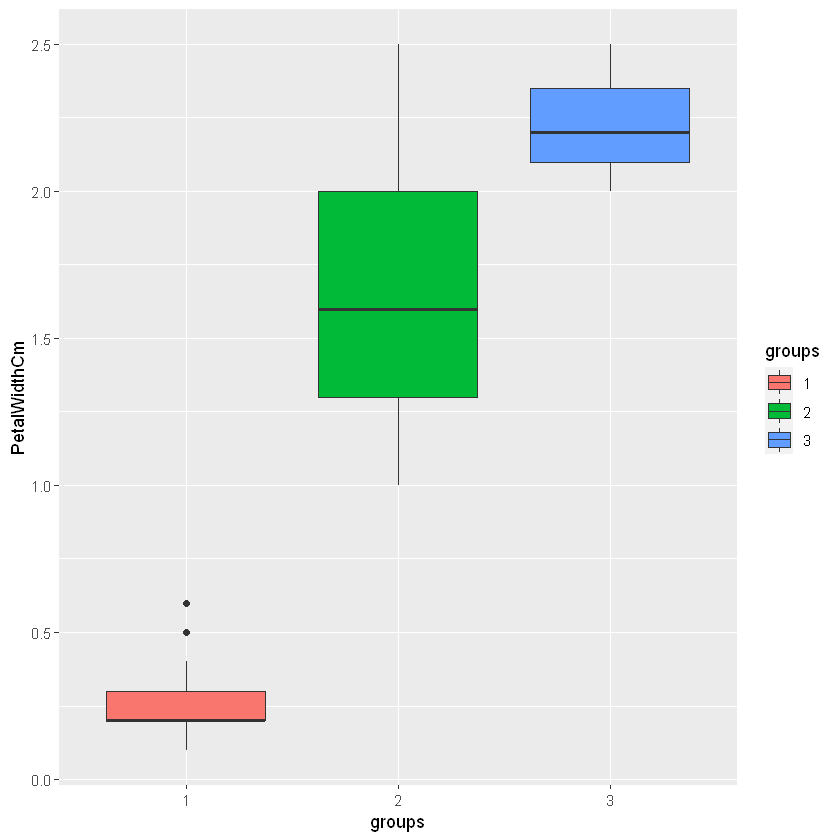

In [18]:
attach(Iris5)

Iris5$groups= as.factor(Iris5$groups)
ggplot(data = Iris5, aes( x= groups, y= SepalLengthCm, fill= groups))+ geom_boxplot()
ggplot(data = Iris5, aes( x= groups, y= SepalWidthCm, fill= groups))+ geom_boxplot()
ggplot(data = Iris5, aes( x= groups, y= PetalLengthCm, fill= groups))+ geom_boxplot()
ggplot(data = Iris5, aes( x= groups, y= PetalWidthCm, fill= groups))+ geom_boxplot()